**Rationale** In this assignment, you will practice specifying, running, and interpreting regressions involving non-linear functional forms and heterogeneous effects. You will be using the datasets located in your Datasets folder.

1. Avocado dataset
1. Starbucks campaign data

In [38]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [39]:
fpath = 'drive/MyDrive/Analytics/Datasets/avocado_prices' # change to your data folder
os.listdir(fpath)

['avocado.csv', 'avocado.json', 'avocado.xlsx', 'starbucks_promos.csv']

# Problem 1 (50 points) Avocado prices 

**Only use data for conventional types and remove the data for the region TotalUS**

First, write a loop through each unique region to plot the 
1. Average Price vs. Total Volume 
1. ln(Average Price) vs Total Volume
1. Average Price) vs ln(Total Volume)
1. ln(Average Price) vs ln(Total Volume)

For each of the above 5 plots, the syntax should look something like:
```
for r in df.region.unique():
    temp = df[df.region==r]
    plt.scatter(....) # fill this in
```

1. Which of the plots of the relationship between price and demand looks most "linear?"


In [40]:
# read in the dataset and replace column name spaces with underscores
avocado = pd.read_csv(fpath + '/avocado.csv', index_col = 0)
avocado.columns = [c.replace(' ', '_') for c in avocado.columns]
avocado.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [41]:
# select regions that are not TotalUS e.g. region != 'TotalUS' and only conventional types

notTotalUS = avocado.loc[(avocado['region']!='TotalUS') & (avocado['type'] == 'conventional')]



In [42]:
# check the unique regions to make sure TotalUS is not in the region column
notTotalUS['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'West', 'WestTexNewMexico'], dtype=object)

In [57]:
# check the unique types to make sure there are only conventional types
notTotalUS['type'].unique()

notTotalUS['Total_Volume'].mean()

1047895.4253600534

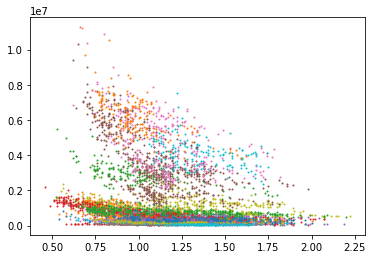

In [44]:
# write a loop to plot average price vs total volume and color each region differently
# e.g.:
# for r in avocado.region.unique():
#     temp = avocado.loc[avocado.region == r]
#     plt.scatter(..., ..., s= 1) # <- change this, make sure price is on the x-axis

for r in notTotalUS.region.unique():
    temp = notTotalUS.loc[notTotalUS.region == r]
    plt.scatter(temp.AveragePrice, temp.Total_Volume, s= 1)


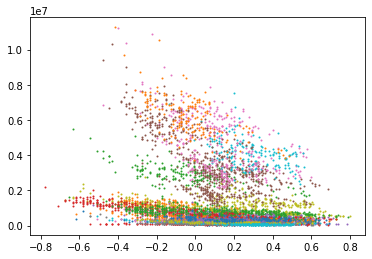

In [45]:
# do the same, but now plot ln(average price) vs. total volume
# remember np.log() takes the log

for r in notTotalUS.region.unique():
    temp = notTotalUS.loc[notTotalUS.region == r]
    plt.scatter(np.log(temp.AveragePrice), temp.Total_Volume, s= 1)


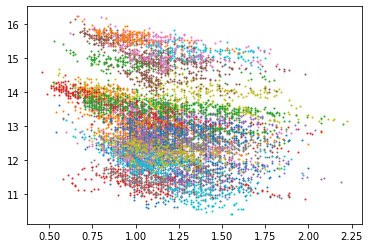

In [46]:
# do the same, but now plot AveragePrice vs ln(Total_Volume)

for r in notTotalUS.region.unique():
    temp = notTotalUS.loc[notTotalUS.region == r]
    plt.scatter(temp.AveragePrice, np.log(temp.Total_Volume), s= 1)


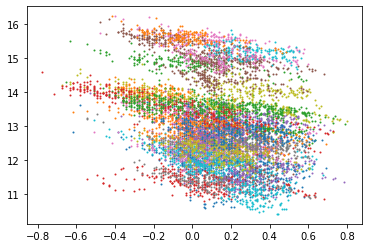

In [47]:
# do the same, but now plot ln(AveragePrice) vs ln(Total_Volume)

for r in notTotalUS.region.unique():
    temp = notTotalUS.loc[notTotalUS.region == r]
    plt.scatter(np.log(temp.AveragePrice), np.log(temp.Total_Volume), s= 1)



**EDIT THIS CELL**

Which plot seems to exhibit the most linear relationship within each region? (i.e. dots of the same color seem to form closest to a straight line).

The plot that seems to exhibit the most linear relationship, is the ln(AveragePrice) vs. ln(Total_Volume) plot. This suggests that the Log-Log model may be most appropriate.

(*models can be level-level, log-log, level-log, log-level.*)


## Regression Model
Using the avocado dataset, estimate the following demand models while accounting for the region effects (incl region in the regression):

1. level - level
1. level - log
1. log - level
1. log - log

Answer the following:
1. Succinctly interpret the **price coefficient** for each model (pay attention to corresponding p-values as well). 

In [ ]:
# run the level-level regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.

res = smf.ols('Total_Volume ~ AveragePrice  + region', data = notTotalUS, missing = 'drop').fit()

# print the regression table below
res.summary()

**Edit this cell**

For the level-level regression, explain the coefficient for the price variable:

1. When we have a $1$ dollar increase in average price, the total volume goes down by 576,700 items. $R^2 = .951$ and $P = 0.000$

In [ ]:
# run the log-level regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.

res = smf.ols('np.log(Total_Volume)~ AveragePrice + region', data = notTotalUS, missing = 'drop').fit()

# print the regression table below

res.summary()

**Edit this cell**

For the log-level regression, explain the coefficient for the price variable:

1. For a $1$ dollar increase in Average Price, Total Volume goes down by 57.86%. $P = 0.000$ and $R^2 = .975$. 




In [ ]:
# run the level-log regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.

res = smf.ols('Total_Volume~ np.log(AveragePrice) + region', data = notTotalUS, missing = 'drop').fit()

# print the regression table below

res.summary()

**Edit this cell**

For the level-log regression, explain the coefficient for the price variable:

1. Answer here: For a 1% increase in Average Price, the Total Volume goes down by 7,443 items. $R^2 = .952, P = 0.00$ Took coefficient and multiplied it by $ln(1.01)$. Got that from this website: https://www.bitlylinks.com/HmdwxK3ZD.

In [ ]:
# run the log-log regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.

res = smf.ols('np.log(Total_Volume)~ np.log(AveragePrice) + region', data = notTotalUS, missing = 'drop').fit()

# print the regression table below

res.summary()


**Edit this cell**

For the log-log regression, explain the meaning of the coefficient for the price variable:

1. Answer here: For a 1% increase in Average Price, we have a .72% decrease in Total Volume. $P = 0.000, R^2 = .976$




# Problem 2 (50 points)

Use the Starbucks promotions data. Filter the data to use only the rows satisfying all of the following conditions:

1. Transaction amount more than 0 and less than 50.
1. Income is not missing (df.income.notnull())

We suspect the average transaction value might be higher for individuals with higher incomes. We also suspect that the higher the offer difficulty (min. amount spend needed to redeem), the higher the spend. However, this effect might be different depending on income. Additionally, the offer type (buy one get one vs. discount) may impact the transaction amount. Moreover, this effect of the offer type may differ depending on income.

1. To capture all of these potential effects, run the following regression: 
$$
ln(\text{Trans Amt}) = \beta_0 + \beta_1 ln(\text{Inc}) + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer} + \beta_4 ln(\text{Inc})\times \text{difficulty} + \beta_5  ln(\text{Inc})\times \text{Disc Offer}+ e
$$

1. Succinctly interpret the regression results.

**Edit this cell**

Demonstrate your understanding of interpretating regressions here by filling the blanks in the statements below:

1. In terms of the $\beta's$ in the equation above, 1% increase in income when a discount offer is made and qualification difficulty is \$10 leads to approximately $(\beta_0+ \beta_1 + \beta_2 + \beta_3 + \beta_4 + \beta_5 + e)$% change in transaction amount. 
1. In terms of the $\beta's$ in the equation above, 1% increase in income when a BOGO offer is made and qualification difficulty is \$5 leads to approximately $(\beta_0+ \beta_1 + \beta_2 + \beta_4 + e)$% change in transaction amount. 

**Remember** the solution here is not as simple as looking at a single coefficient. The effect of income depends on offer type and difficulty.

Note, you can re-write the equation as:
$$
ln(\text{Trans Amt}) = \beta_0  + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer}  + \big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big] \times ln(\text{Inc})+ e
$$

Where the entire effect of $ln(income)$ on $ln(TransactionAmount)$ is captured by the expression $\big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big]$.

In [52]:
# read the starbucks data 
sb = pd.read_csv(fpath + '/starbucks_promos.csv', index_col=0) 


In [53]:
# select rows with transactions >0 but <50 and income is not missing
# replace sb with the result of the selection
sb = sb.loc[(sb['transaction_amount']<50) & (sb['transaction_amount']>0) & (sb['income'].notnull())]

sb['difficulty'].unique()

array([10.,  5.,  7., 20.])

In [54]:
# run the regression here, store the result as the variable res

formula = 'np.log(transaction_amount) ~ np.log(income) + C(difficulty) + C(offer_type) + np.log(income)*C(difficulty)+ np.log(income)*C(offer_type)'

res = smf.ols(formula, data = sb, missing = 'drop').fit()


In [55]:
# print the result summary here, e.g. print(res.summary()):

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(transaction_amount)   R-squared:                       0.413
Model:                                    OLS   Adj. R-squared:                  0.413
Method:                         Least Squares   F-statistic:                     2399.
Date:                        Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                                18:47:50   Log-Likelihood:                -21050.
No. Observations:                       30695   AIC:                         4.212e+04
Df Residuals:                           30685   BIC:                         4.220e+04
Df Model:                                   9                                         
Covariance Type:                    nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -9.4500      0.178    -52.946      0.000      -9.800      -9.100
C(difficulty)[T.7.0]                         3.3977      0.402      8.446      0.000       2.609       4.186
C(difficulty)[T.10.0]                        4.7132      0.276     17.049      0.000       4.171       5.255
C(difficulty)[T.20.0]                        6.6199      0.437     15.160      0.000       5.764       7.476
C(offer_type)[T.discount]                   -6.8498      0.274    -24.992      0.000      -7.387      -6.313
np.log(income)                               1.0934      0.016     67.883      0.000       1.062       1.125
np.log(income):C(difficulty)[T.7.0]         -0.2944      0.036     -8.116      0.000      -0.365      -0.223
np.log(income):C(difficulty)[T.10.0]        -0.4068      0.025    -16.361      0.000      -0.455      -0.358
np.log(income):C(difficulty)[T.20.0]        -0.5598      0.039    -14.254      0.000      -0.637      -0.483
np.log(income):C(offer_type)[T.discount]     0.5952      0.025     24.152      0.000       0.547       0.644
==============================================================================
Omnibus:                     8720.131   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34888.731
Skew:                          -1.365   Prob(JB):                         0.00
Kurtosis:                       7.452   Cond. No.                     3.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the the estimated coefficients, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately 10.31% **decrease** in transaction amount. 
1. In terms of the estimated coefficients, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to 8.36% **decrease** in transaction amount. 

**Basically,** substitute the $\beta's$ from the answer above with the estimated coefficients.